In [2]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib widget
import os
from scipy.signal import savgol_filter
from scipy.optimize import root

In [113]:
fontsize_legend = 20
fontsize_axes = 24
fontsize_ticks = 16
linewidth_all = 3
markersize_all = 8

figsize_whole = (6,5)
figsize_three = (15,5)
figsize_three_vert = (6, 13)
figsize_two = (10,5)
folder_out = 'figures_paper'

color_2folds = 'palevioletred'
color_3folds = 'firebrick'
color_4folds = 'steelblue'

def smooth_pv_data(pressure, window_len = 100):
    # window_len = 100
    poly_order = 2
    len_pressure, num_exp = np.shape(pressure)

    pressure_smooth = np.zeros((len_pressure, num_exp))

    for i in range(num_exp):
        pressure_smooth[:,i] = savgol_filter(pressure[:,i], window_len, poly_order)
    
    return pressure_smooth

def rescale_eigenvalue(eigenvalues_cur):
    return np.sign(eigenvalues_cur) * np.sqrt(np.abs(eigenvalues_cur)) * 1/(2*np.pi)


In [77]:
a = [1,2,3,4,5,6]
a[::2]

[1, 3, 5]

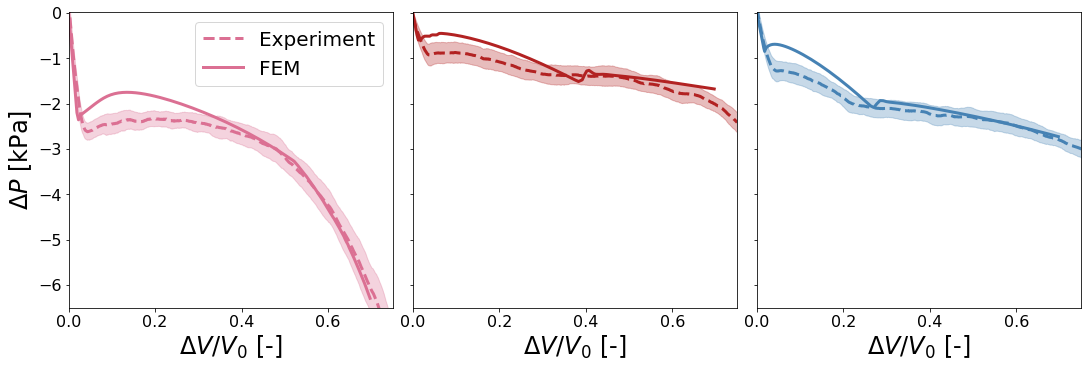

In [110]:
fig, ax = plt.subplots(1,3,figsize = figsize_three, constrained_layout = True, sharey = True)

select_fac = 1

#######################################################

'''load exp 4 folds'''
data_all = np.loadtxt('exp_results/PV_4f_Fig1_exp.csv', skiprows = 2, delimiter = ',')
vol_all = data_all[:,0]

pressure_4_mean = np.mean(data_all[:,1:], axis = 1)
pressure_4_exp_std = np.std(data_all[:,1:], axis = 1)

pressure_4_smooth = smooth_pv_data(data_all[:,1:], 120)
pressure_4_smooth_mean = np.mean(pressure_4_smooth, axis = 1)
pressure_4_smooth_std = np.std(pressure_4_smooth, axis = 1)

R = 10 #mm
H = 18 #mm
vol_0 = np.pi * R * R * H * 1e-3 #mm^3 * 1000 should be cm^3 aka mL
pressure_0 = pressure_4_mean[0]

ax[2].plot((vol_all/vol_0)[::select_fac], pressure_4_smooth_mean[::select_fac], '--', label = 'Experiment: 4 folds', linewidth = linewidth_all, color = color_4folds)
ax[2].fill_between(vol_all/vol_0, pressure_4_smooth_mean + pressure_4_smooth_std, pressure_4_smooth_mean - pressure_4_smooth_std, alpha = 0.3, color = color_4folds)

'''load 4 folds sim data'''
t, E = (0.56, 1.4)
nu = 0.5
data_cur = np.loadtxt(f'data_out/4fold-fitting-400_pcav_cvol.txt')
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3
ax[2].plot(vol_norm,pressure_kpa, label = 'FEM', color = color_4folds, linewidth = linewidth_all)

###########################################################

'''2 folds exp data'''
data_all = np.loadtxt('exp_results/PV_2f_Fig1_exp.csv', skiprows = 2, delimiter = ',')
vol_all = data_all[:,0]
pressure_2 = data_all[:,1:]
pressure_2_smooth = smooth_pv_data(pressure_2)
pressure_2_smooth_mean = np.mean(pressure_2_smooth, axis = 1)
pressure_2_smooth_std = np.std(pressure_2_smooth, axis = 1)

R = 8.8 #mm
H = 44.75 #mm
vol_0 = np.pi * R * R * H * 1e-3 #mm^3 * 1000 should be cm^3 aka mL

ax[0].plot((vol_all/vol_0)[::select_fac], pressure_2_smooth_mean[::select_fac], '--', label = 'Experiment', linewidth = linewidth_all, color = color_2folds)
ax[0].fill_between(vol_all/vol_0, pressure_2_smooth_mean + pressure_2_smooth_std, pressure_2_smooth_mean - pressure_2_smooth_std, alpha = 0.3, color = color_2folds)

'''2 folds sim data'''
E, t = (1.4, 1.2)
data_cur = np.loadtxt(f'data_out/2fold-fitting-300_pcav_cvol.txt')
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3

ax[0].plot(vol_norm,pressure_kpa, label = 'FEM', color = color_2folds, linewidth = linewidth_all)

#################################################################

'''load 3 folds exp data'''
data_all = np.loadtxt('exp_results/PV_3f_R10.csv', skiprows = 2, delimiter = ',', usecols=tuple(range(9)))
vol_all = data_all[:,0]

pressure_3_smooth = smooth_pv_data(data_all[:,1:], 120)
pressure_3_smooth_mean = np.mean(pressure_3_smooth, axis = 1)
pressure_3_smooth_std = np.std(pressure_3_smooth, axis = 1)

R = 10 #mm
H = 27 #mm
vol_0 = np.pi * R * R * H * 1e-3 #mm^3 * 1000 should be cm^3 aka mL

eps = -0.009
ax[1].plot((vol_all/vol_0)[::select_fac] + eps, pressure_3_smooth_mean[::select_fac], '--', label = 'Experiment: 3 folds', linewidth = linewidth_all, color = color_3folds)
ax[1].fill_between(vol_all/vol_0 + eps, pressure_3_smooth_mean + pressure_3_smooth_std, pressure_3_smooth_mean - pressure_3_smooth_std, alpha = 0.3, color = color_3folds)

'''load 3 folds sim data'''
t, E = (0.58, 1.4)
#plot nu = 0.5 up to \delta V/V_0 = 0.7 for fitted parameters
nu = 0.5
data_cur = np.loadtxt(f'data_out/3fold-fitting-411_pcav_cvol.txt')
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3
ax[1].plot(vol_norm,pressure_kpa, label = rf't = {t}mm, E = {E}MPa', color = color_3folds, linewidth = linewidth_all)

############################################################


#set parameters for plot
ax[0].set_ylim(top = 0.01, bottom = -6.5)
ax[0].set_ylabel('$\Delta P$ [kPa]', fontsize = fontsize_axes)
for i in range(len(ax)):
    ax[i].set_xlabel('$\Delta V/V_0$ [-]', fontsize = fontsize_axes)
    ax[i].set_xlim(left = 0, right = 0.75)
    ax[i].tick_params(labelsize = fontsize_ticks)
ax[0].legend(loc = 'best', fontsize = fontsize_legend)

fig.savefig(f'{folder_out}/pv_all.png', dpi = 300)

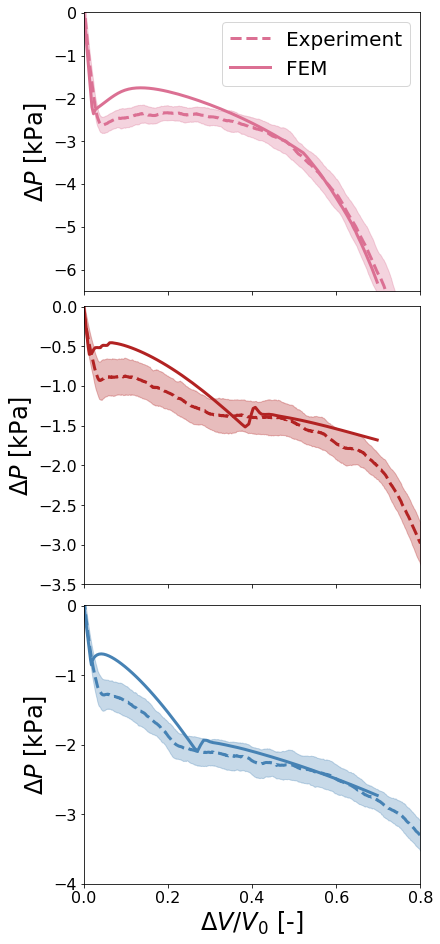

In [114]:
fig, ax = plt.subplots(3,1,figsize = figsize_three_vert, constrained_layout = True, sharex = True)

#######################################################

'''load exp 4 folds'''
data_all = np.loadtxt('exp_results/PV_4f_Fig1_exp.csv', skiprows = 2, delimiter = ',')
vol_all = data_all[:,0]

pressure_4_mean = np.mean(data_all[:,1:], axis = 1)
pressure_4_exp_std = np.std(data_all[:,1:], axis = 1)

pressure_4_smooth = smooth_pv_data(data_all[:,1:], 120)
pressure_4_smooth_mean = np.mean(pressure_4_smooth, axis = 1)
pressure_4_smooth_std = np.std(pressure_4_smooth, axis = 1)

R = 10 #mm
H = 18 #mm
vol_0 = np.pi * R * R * H * 1e-3 #mm^3 * 1000 should be cm^3 aka mL
pressure_0 = pressure_4_mean[0]

ax[2].plot(vol_all/vol_0, pressure_4_smooth_mean, '--', label = 'Experiment: 4 folds', linewidth = linewidth_all, color = color_4folds)
ax[2].fill_between(vol_all/vol_0, pressure_4_smooth_mean + pressure_4_smooth_std, pressure_4_smooth_mean - pressure_4_smooth_std, alpha = 0.3, color = color_4folds)

'''load 4 folds sim data'''
t, E = (0.56, 1.4)
nu = 0.5
data_cur = np.loadtxt(f'data_out/4fold-fitting-400_pcav_cvol.txt')
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3
ax[2].plot(vol_norm,pressure_kpa, label = 'FEM', color = color_4folds, linewidth = linewidth_all)

###########################################################

'''2 folds exp data'''
data_all = np.loadtxt('exp_results/PV_2f_Fig1_exp.csv', skiprows = 2, delimiter = ',')
vol_all = data_all[:,0]
pressure_2 = data_all[:,1:]
pressure_2_smooth = smooth_pv_data(pressure_2)
pressure_2_smooth_mean = np.mean(pressure_2_smooth, axis = 1)
pressure_2_smooth_std = np.std(pressure_2_smooth, axis = 1)

R = 8.8 #mm
H = 44.75 #mm
vol_0 = np.pi * R * R * H * 1e-3 #mm^3 * 1000 should be cm^3 aka mL

ax[0].plot(vol_all/vol_0, pressure_2_smooth_mean, '--', label = 'Experiment', linewidth = linewidth_all, color = color_2folds)
ax[0].fill_between(vol_all/vol_0, pressure_2_smooth_mean + pressure_2_smooth_std, pressure_2_smooth_mean - pressure_2_smooth_std, alpha = 0.3, color = color_2folds)

'''2 folds sim data'''
E, t = (1.4, 1.2)
data_cur = np.loadtxt(f'data_out/2fold-fitting-300_pcav_cvol.txt')
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3

ax[0].plot(vol_norm,pressure_kpa, label = 'FEM', color = color_2folds, linewidth = linewidth_all)

#################################################################

'''load 3 folds exp data'''
data_all = np.loadtxt('exp_results/PV_3f_R10.csv', skiprows = 2, delimiter = ',', usecols=tuple(range(9)))
vol_all = data_all[:,0]

pressure_3_smooth = smooth_pv_data(data_all[:,1:], 120)
pressure_3_smooth_mean = np.mean(pressure_3_smooth, axis = 1)
pressure_3_smooth_std = np.std(pressure_3_smooth, axis = 1)

R = 10 #mm
H = 27 #mm
vol_0 = np.pi * R * R * H * 1e-3 #mm^3 * 1000 should be cm^3 aka mL

eps = -0.009
ax[1].plot(vol_all/vol_0 + eps, pressure_3_smooth_mean, '--', label = 'Experiment: 3 folds', linewidth = linewidth_all, color = color_3folds)
ax[1].fill_between(vol_all/vol_0 + eps, pressure_3_smooth_mean + pressure_3_smooth_std, pressure_3_smooth_mean - pressure_3_smooth_std, alpha = 0.3, color = color_3folds)

'''load 3 folds sim data'''
t, E = (0.58, 1.4)
#plot nu = 0.5 up to \delta V/V_0 = 0.7 for fitted parameters
nu = 0.5
data_cur = np.loadtxt(f'data_out/3fold-fitting-411_pcav_cvol.txt')
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3
ax[1].plot(vol_norm,pressure_kpa, label = rf't = {t}mm, E = {E}MPa', color = color_3folds, linewidth = linewidth_all)

############################################################


#set parameters for plot
ax[0].set_ylim(top = 0.01, bottom = -6.5)
ax[2].set_xlabel('$\Delta V/V_0$ [-]', fontsize = fontsize_axes)
for i in range(len(ax)):
    ax[i].set_xlim(left = 0, right = 0.8)
    ax[i].tick_params(labelsize = fontsize_ticks)
    ax[i].set_ylim(top = 0.01)
    ax[i].set_ylabel('$\Delta P$ [kPa]', fontsize = fontsize_axes)
ax[0].set_ylim(bottom = -6.5)
ax[1].set_ylim(bottom = -3.5)
ax[2].set_ylim(bottom = -4)
ax[0].legend(loc = 'best', fontsize = fontsize_legend)

fig.savefig(f'{folder_out}/pv_all_vert.png', dpi = 300)

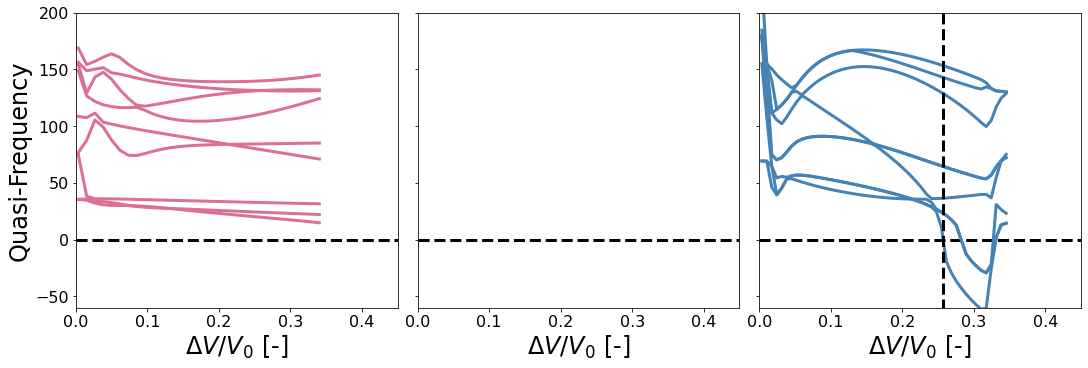

In [95]:
fig, ax = plt.subplots(1,3,figsize = figsize_three, constrained_layout = True, sharey = True)

for axis in ax: axis.hlines(0,0,0.5, 'k', '--', linewidth = linewidth_all)

nu_try = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]


initial_idx = 260

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd']

########################################
'''4 folds freq'''
idx_4 = 265
nu = 0.5
idx_plot = 2
color_plot = 'firebrick'

data_path = f'data_out/4fold-test_nu-{idx_4}_eig_val.txt'
data_cur = np.loadtxt(data_path)
temp_all = data_cur[:,0]
freq_all = data_cur[:,1:]

for j in range(np.shape(freq_all)[1]-1):
    freq_rescale = rescale_eigenvalue(freq_all[:,j])
    # ax[idx_plot].plot(-3*temp_all, freq_rescale, 'o', color = color_plot, markersize = markersize_all)
    if j == 0:
        ax[idx_plot].plot(-3*temp_all, freq_rescale, '-', color = color_4folds, label = rf'$\nu$ = {nu}', linewidth = linewidth_all)
    else:
        ax[idx_plot].plot(-3*temp_all, freq_rescale, '-', color = color_4folds, linewidth = linewidth_all)


ylim_cur = ax[idx_plot].get_ylim()
f = lambda x: np.interp(x,-3*temp_all,freq_all[:,0])
sol_root = root(f,0.25)
ax[idx_plot].vlines(float(sol_root.x),ylim_cur[0], ylim_cur[1], 'black', '--', linewidth = linewidth_all, label = '$\lambda = 0$')

########################################

'''2 folds freq'''
idx_2 = 305
nu = 0.5
idx_plot = 0
color_plot = 'firebrick'

data_path = f'data_out/2fold-test_nu-{idx_2}_eig_val.txt'
data_cur = np.loadtxt(data_path)
temp_all = data_cur[:,0]
freq_all = data_cur[:,1:]

for j in range(np.shape(freq_all)[1]-1):
    freq_rescale = rescale_eigenvalue(freq_all[:,j])
    # ax[idx_plot].plot(-3*temp_all, freq_rescale, 'o', color = color_plot, markersize = markersize_all)
    if j == 0:
        ax[idx_plot].plot(-3*temp_all, freq_rescale, '-', color = color_2folds, label = rf'$\nu$ = {nu}', linewidth = linewidth_all)
    else:
        ax[idx_plot].plot(-3*temp_all, freq_rescale, '-', color = color_2folds, linewidth = linewidth_all)

########################################

'''3 folds freq'''

ax[0].set_ylabel('Quasi-Frequency', fontsize = fontsize_axes)
ax[0].set_ylim(top = 200, bottom = -60)
for axis in ax:
    axis.set_xlabel('$\Delta V/V_0$ [-]', fontsize = fontsize_axes)
    axis.tick_params(labelsize = fontsize_ticks)
    axis.set_xlim(0,0.45)


fig.savefig(f'{folder_out}/freq_all.jpg', dpi = 300)


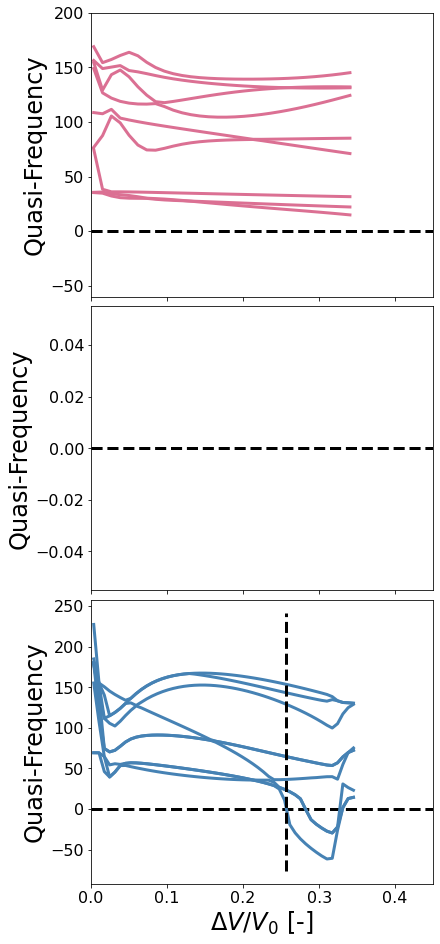

In [117]:
fig, ax = plt.subplots(3,1,figsize = figsize_three_vert, constrained_layout = True, sharex = True)

for axis in ax: axis.hlines(0,0,0.5, 'k', '--', linewidth = linewidth_all)

nu_try = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]


initial_idx = 260

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd']

########################################
'''4 folds freq'''
idx_4 = 265
nu = 0.5
idx_plot = 2
color_plot = 'firebrick'

data_path = f'data_out/4fold-test_nu-{idx_4}_eig_val.txt'
data_cur = np.loadtxt(data_path)
temp_all = data_cur[:,0]
freq_all = data_cur[:,1:]

for j in range(np.shape(freq_all)[1]-1):
    freq_rescale = rescale_eigenvalue(freq_all[:,j])
    # ax[idx_plot].plot(-3*temp_all, freq_rescale, 'o', color = color_plot, markersize = markersize_all)
    if j == 0:
        ax[idx_plot].plot(-3*temp_all, freq_rescale, '-', color = color_4folds, label = rf'$\nu$ = {nu}', linewidth = linewidth_all)
    else:
        ax[idx_plot].plot(-3*temp_all, freq_rescale, '-', color = color_4folds, linewidth = linewidth_all)


ylim_cur = ax[idx_plot].get_ylim()
f = lambda x: np.interp(x,-3*temp_all,freq_all[:,0])
sol_root = root(f,0.25)
ax[idx_plot].vlines(float(sol_root.x),ylim_cur[0], ylim_cur[1], 'black', '--', linewidth = linewidth_all, label = '$\lambda = 0$')

########################################

'''2 folds freq'''
idx_2 = 305
nu = 0.5
idx_plot = 0
color_plot = 'firebrick'

data_path = f'data_out/2fold-test_nu-{idx_2}_eig_val.txt'
data_cur = np.loadtxt(data_path)
temp_all = data_cur[:,0]
freq_all = data_cur[:,1:]

for j in range(np.shape(freq_all)[1]-1):
    freq_rescale = rescale_eigenvalue(freq_all[:,j])
    # ax[idx_plot].plot(-3*temp_all, freq_rescale, 'o', color = color_plot, markersize = markersize_all)
    if j == 0:
        ax[idx_plot].plot(-3*temp_all, freq_rescale, '-', color = color_2folds, label = rf'$\nu$ = {nu}', linewidth = linewidth_all)
    else:
        ax[idx_plot].plot(-3*temp_all, freq_rescale, '-', color = color_2folds, linewidth = linewidth_all)

########################################

'''3 folds freq'''

ax[2].set_xlabel('$\Delta V/V_0$ [-]', fontsize = fontsize_axes)
ax[0].set_ylim(top = 200, bottom = -60)
for axis in ax:
    axis.set_ylabel('Quasi-Frequency', fontsize = fontsize_axes)
    axis.tick_params(labelsize = fontsize_ticks)
    axis.set_xlim(0,0.45)


fig.savefig(f'{folder_out}/freq_all_vert.jpg', dpi = 300)


array([[<AxesSubplot: ylabel='Contraction [-]'>, <AxesSubplot: >],
       [<AxesSubplot: xlabel='$\\Delta V/V_0$ [-]', ylabel='Twist $\\phi$ [deg]'>,
        <AxesSubplot: xlabel='$-\\Delta P$ [kPa]'>]], dtype=object)

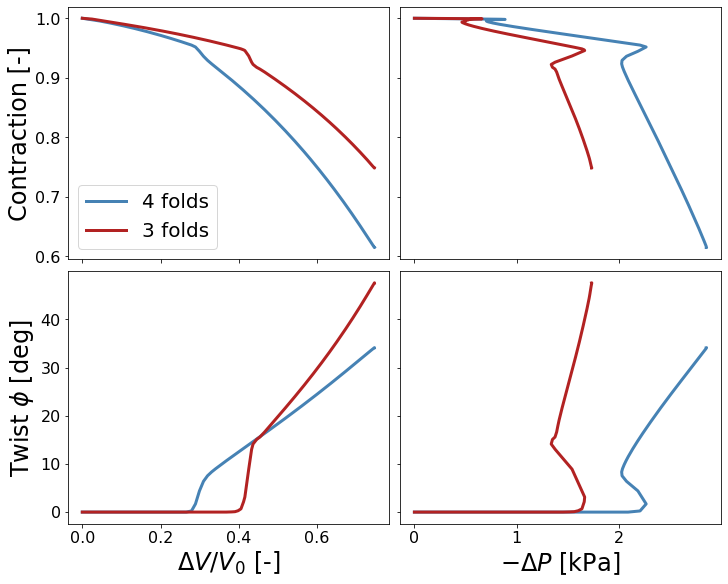

In [96]:
fig, ax = plt.subplots(2,2,figsize = (10,8), constrained_layout = True, sharey = 'row', sharex = 'col')

'''4 folds'''
idx_cur = 109
folds_num = 4
contraction_path = f'data_out/sim-long-{folds_num}folds-{idx_cur}_contraction_twist.txt'
pv_path = f'data_out/sim-long-{folds_num}folds-{idx_cur}_pcav_cvol.txt'


t_all, contraction_all, twist_all = np.loadtxt(contraction_path, unpack = True)
vol_all, pressure_mpa = np.loadtxt(pv_path, unpack = True)
twist_deg = twist_all * 180/np.pi
vol_norm = -(vol_all - vol_all[0])/vol_all[0]
pressure_kpa = pressure_mpa * 1e3


ax[0,0].plot(vol_norm, contraction_all, linewidth = linewidth_all, label = '4 folds', color = color_4folds)
ax[1,0].plot(vol_norm, twist_deg, linewidth = linewidth_all, color = color_4folds)
ax[0,1].plot(-pressure_kpa, contraction_all, linewidth = linewidth_all, color = color_4folds)
ax[1,1].plot(-pressure_kpa, twist_deg, linewidth = linewidth_all, color = color_4folds)


##########################################################
'''4 folds'''
idx_cur = 108
folds_num = 3
contraction_path = f'data_out/sim-long-{folds_num}folds-{idx_cur}_contraction_twist.txt'
pv_path = f'data_out/sim-long-{folds_num}folds-{idx_cur}_pcav_cvol.txt'


t_all, contraction_all, twist_all = np.loadtxt(contraction_path, unpack = True)
vol_all, pressure_mpa = np.loadtxt(pv_path, unpack = True)
twist_deg = twist_all * 180/np.pi
vol_norm = -(vol_all - vol_all[0])/vol_all[0]
pressure_kpa = pressure_mpa * 1e3

ax[0,0].plot(vol_norm, contraction_all, linewidth = linewidth_all, label = '3 folds', color = color_3folds)
ax[1,0].plot(vol_norm, twist_deg, linewidth = linewidth_all, color = color_3folds)
ax[0,1].plot(-pressure_kpa, contraction_all, linewidth = linewidth_all, color = color_3folds)
ax[1,1].plot(-pressure_kpa, twist_deg, linewidth = linewidth_all, color = color_3folds)

#######################################

ax[1,0].set_xlabel('$\Delta V/V_0$ [-]', fontsize = fontsize_axes)
ax[1,1].set_xlabel('$-\Delta P$ [kPa]', fontsize = fontsize_axes)

ax[0,0].set_ylabel('Contraction [-]', fontsize = fontsize_axes)
ax[1,0].set_ylabel('Twist $\phi$ [deg]', fontsize = fontsize_axes)

ax[0,0].legend(loc = 'best', fontsize = fontsize_legend)

for axis in np.ndarray.flatten(ax):
    axis.tick_params(labelsize = fontsize_ticks)
ax


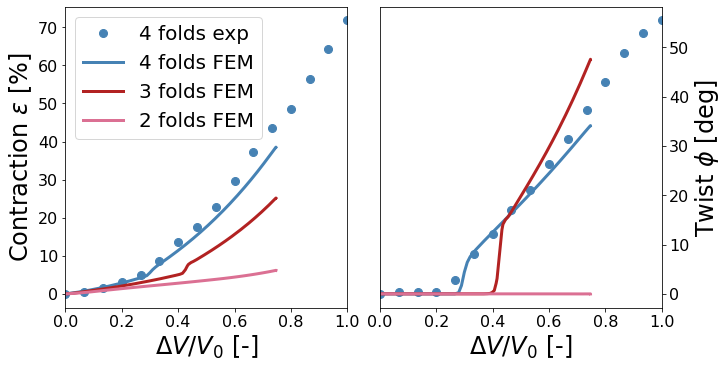

In [100]:
fig, ax = plt.subplots(1,2,figsize = figsize_two, constrained_layout = True)


'''4 folds exp'''
exp_data = np.loadtxt('exp_results/DV_4f_bending_ignored.csv', skiprows = 2, delimiter=',')
vol_norm = exp_data[:,0]
contraction_mean = np.mean(exp_data[:,1:4], axis = 1)
twist_mean = np.mean(exp_data[:,4:7], axis = 1)

ax[0].plot(vol_norm, contraction_mean, 'o', markersize = markersize_all, linewidth = linewidth_all, label = '4 folds exp', color = color_4folds)
ax[1].plot(vol_norm, twist_mean, 'o', markersize = markersize_all, linewidth = linewidth_all, color = color_4folds)


##########################################################
'''4 folds sim'''
idx_cur = 109
folds_num = 4
contraction_path = f'data_out/sim-long-{folds_num}folds-{idx_cur}_contraction_twist.txt'
pv_path = f'data_out/sim-long-{folds_num}folds-{idx_cur}_pcav_cvol.txt'
props_path = f'data_out/sim-long-{folds_num}folds-{idx_cur}_props.txt'

#[self.H, self.R, self.t1, self.t2, self.theta, self.w, self.E1, self.E2, self.E_cap, self.h_element]

t_all, contraction_all, twist_all = np.loadtxt(contraction_path, unpack = True)
vol_all, pressure_mpa = np.loadtxt(pv_path, unpack = True)
twist_deg = twist_all * 180/np.pi
vol_norm = -(vol_all - vol_all[0])/vol_all[0]
pressure_kpa = pressure_mpa * 1e3
contraction_strain = 1 - contraction_all


ax[0].plot(vol_norm, contraction_strain*100, linewidth = linewidth_all, label = '4 folds FEM', color = color_4folds)
ax[1].plot(vol_norm, twist_deg, linewidth = linewidth_all, color = color_4folds)


##########################################################
'''3 folds sim'''
idx_cur = 108
folds_num = 3
contraction_path = f'data_out/sim-long-{folds_num}folds-{idx_cur}_contraction_twist.txt'
pv_path = f'data_out/sim-long-{folds_num}folds-{idx_cur}_pcav_cvol.txt'


t_all, contraction_all, twist_all = np.loadtxt(contraction_path, unpack = True)
vol_all, pressure_mpa = np.loadtxt(pv_path, unpack = True)
twist_deg = twist_all * 180/np.pi
vol_norm = -(vol_all - vol_all[0])/vol_all[0]
pressure_kpa = pressure_mpa * 1e3
contraction_strain = 1 - contraction_all

ax[0].plot(vol_norm, contraction_strain*100, linewidth = linewidth_all, label = '3 folds FEM', color = color_3folds)
ax[1].plot(vol_norm, twist_deg, linewidth = linewidth_all, color = color_3folds)


#######################################
'''2 folds sim'''
idx_cur = 110
folds_num = 2
contraction_path = f'data_out/sim-long-{folds_num}folds-{idx_cur}_contraction_twist.txt'
pv_path = f'data_out/sim-long-{folds_num}folds-{idx_cur}_pcav_cvol.txt'


t_all, contraction_all, twist_all = np.loadtxt(contraction_path, unpack = True)
vol_all, pressure_mpa = np.loadtxt(pv_path, unpack = True)
twist_deg = twist_all * 180/np.pi
vol_norm = -(vol_all - vol_all[0])/vol_all[0]
pressure_kpa = pressure_mpa * 1e3
contraction_strain = 1 - contraction_all

ax[0].plot(vol_norm, contraction_strain*100, linewidth = linewidth_all, label = '2 folds FEM', color = color_2folds)
ax[1].plot(vol_norm, twist_deg, linewidth = linewidth_all, color = color_2folds)


#######################################



ax[0].set_ylabel(r'Contraction $\varepsilon$ [%]', fontsize = fontsize_axes)
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")
ax[1].set_ylabel('Twist $\phi$ [deg]', fontsize = fontsize_axes)

ax[0].legend(loc = 'best', fontsize = fontsize_legend)

for axis in np.ndarray.flatten(ax):
    axis.tick_params(labelsize = fontsize_ticks)
    axis.set_xlabel('$\Delta V/V_0$ [-]', fontsize = fontsize_axes)
    axis.set_xlim(0,1)

fig.savefig(f'{folder_out}/twist_cont_4_3.png', dpi = 300)

